# Exploratory Data Analysis - Task 3 - Case Yara

## Question: 
> The VP of Commercial Excellence Americas, the loyalty program’s sponsor, requested the analytics team to evaluate the program’s success by comparing loyalty to non-loyalty farmers. Are loyalty users different from regular users in relation to the main KPIs, app utilization and churn? Another important aspect is to understand if there are any BUs being more successful in acquiring and maintaining users in our digital tools. Create a 10-15 min presentation, bearing in mind she is not familiarized with technical data analysis terms. Please feel free to suggest data driven action plans. 

### KPIs to keep in mind
- **Active users**: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned. 
- **Active fields**: non-archived fields belonging to active users. 
- **Active hectares**: field area belonging to active fields. 

### Steps to follow in the analysis
1. [Data Preparation:](#1.-Data-Preparation) 
   1. Load Dataset to Pandas;
   2. Clean the data by handling missing values, inconsistencies or outliers, if necessary;
   3. Create a new column to identify active users;
2. [Compare Loyalty vs. Non-Loyalty users:](#2.-Compare-Loyalty-vs.-Non-Loyalty-users)
   1. Split the dataset into loyalty users and non-loyalty users based on the loyalty column;
   2. Calculate and compare the main KPIs (active users, active fields, active hectares) between loyalty users and non-loyalty users;
3. [Analyze app utilization:](#3.-Analyze-app-utilization)
   1. Split the dataset for loyalty users and non-loyalty users;
   2. Calculate and compare the average utilization of these app features between the two user groups;
4. [Analyze churn:](#4.-Analyze-churn)
   1. Identify churned users using the active users column created;
   2. Calculate the churn rate for loyalty users and non-loyalty users;
   3. Compare the churn rates between the two user groups;
   4. Consider using additional factors like user engagement metrics to understand the reasons for churn;
5. [Evaluate Business Unit Performance:](#5.-Evaluate-Business-Unit-Performance)
   1. Group the data by Business Unit using the `bu_name` column;
   2. Calculate the number of active users, active fields, and active hectares for each BU;
   3. Identify the BUs that have the highest acquisition and retention rates of users in the digital tools;
6. [Summarize and Present Findings:](#6.-Summarize-and-Present-Findings)
   1. Summarize the key findings and insights from the analysis;



## 1. Data Preparation

In [651]:
import pandas as pd
import sys 
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../python/function')
from data_cleaning_and_processing import data_cleaning_and_processing
# Set the float format option
pd.options.display.float_format = '{:.2f}'.format

# Set option for pandas to display all the columns
pd.set_option('display.max_columns', None)

# set configurations for searborn 
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,5.27)})

### 1.1. Load Dataset to Pandas

In [652]:
# Load the dataset
case_dataset = data_cleaning_and_processing.prepare_dataset(r"../dataset_provided/agtech_use_case.csv")
case_dataset = case_dataset.loc[case_dataset.user_type == 'farmer']
case_dataset

,id,user_type,bu_name,loyalty,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area,main_crop,state,region
0,1,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
1,5,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
2,6,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
3,7,farmer,NaN,False,2023-07-06,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
4,14,farmer,NaN,False,2023-07-08,2023-07-08,1,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,112566,farmer,NaN,False,2021-09-02,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12758,112600,farmer,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,1,1,1,171.50,171.50,NaN,NaN,NaN
12759,112609,farmer,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN
12762,112637,farmer,NaN,False,2021-09-08,2021-09-08,669,NaN,NaT,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,0,0,0,0.00,NaN,NaN,NaN,NaN


### 1.2. Clean the data by handling missing values, inconsistencies or outliers, if necessary

#### Data cleaning steps already performed:
- replaced all occurrences of the dot character `.` with the forward slash character `/` in the `user_reg_date` and `last_event_date`
- converted the values in the `user_reg_date`, `last_event_date`, `recommendation_generated_last_date`, `map_created_last_date`, `monitoring_last_date`, `field_exploring_last_date` columns from a _string_ format to a _datetime_ format
- replaced specific values in the `user_type` column of the `case_dataset` DataFrame
- applied a lambda function to the `loyalty` column of the `case_dataset` DataFrame. If the cell contains `YES`, it is `TRUE`, otherwise it is `FALSE`
- removed any leading whitespace from the values in the `main_crop` column


In [653]:
case_dataset.describe()

,id,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area
count,9563.00,9563,9563,9563.00,44.00,44,267.00,267,215.00,1180.00,1180,622.00,1222.00,1222,672.00,9563.00,9563.00,9563.00,9563.00,2959.00
mean,50636.30,2022-07-11 03:26:35.775384320,2022-08-16 04:17:47.614765056,326.82,1.70,2022-09-23 04:54:32.727272704,3.47,2022-10-06 00:43:08.764045056,2.80,38.82,2022-07-03 00:57:21.355932160,43.40,22.37,2022-07-15 13:42:31.227495936,25.73,138.13,2.20,0.40,6589.19,22757.92
min,1.00,2019-02-05 00:00:00,2021-09-07 00:00:00,1.00,1.00,2021-10-21 00:00:00,1.00,2021-04-15 00:00:00,1.00,1.00,2019-08-09 00:00:00,1.00,1.00,2021-04-14 00:00:00,1.00,0.00,0.00,0.00,0.00,0.01
25%,25210.50,2021-12-31 00:00:00,2022-02-01 00:00:00,109.00,1.00,2022-07-04 12:00:00,1.00,2022-07-18 00:00:00,1.00,2.00,2022-01-09 00:00:00,3.00,2.00,2022-02-01 06:00:00,2.00,0.00,0.00,0.00,0.00,0.72
50%,49569.00,2022-06-30 00:00:00,2022-08-07 00:00:00,336.00,1.00,2022-08-20 12:00:00,2.00,2022-08-30 00:00:00,1.00,7.00,2022-07-19 12:00:00,8.00,4.00,2022-07-26 00:00:00,7.00,0.00,0.00,0.00,0.00,8.59
75%,75141.00,2023-02-10 00:00:00,2023-03-22 00:00:00,523.00,2.00,2022-12-18 06:00:00,3.00,2023-01-08 00:00:00,2.00,22.00,2022-12-12 00:00:00,28.00,16.00,2022-11-20 18:00:00,23.00,1.00,1.00,1.00,0.23,143.27
max,112711.00,2023-07-08 00:00:00,2023-07-08 00:00:00,670.00,7.00,2023-07-01 00:00:00,88.00,2023-07-08 00:00:00,88.00,5378.00,2023-07-08 00:00:00,5151.00,1084.00,2023-07-08 00:00:00,683.00,458542.00,1682.00,38.00,16471966.99,16471966.99
std,30077.60,NaN,NaN,214.06,1.37,NaN,7.88,NaN,6.94,194.10,NaN,224.82,62.65,NaN,62.06,5171.10,25.21,1.19,209552.40,383820.58


##### Findings

In [654]:
case_describe = case_dataset.describe()
case_describe

,id,user_reg_date,last_event_date,days_since_last_visit,recommendation_generated,recommendation_generated_last_date,map_created,map_created_last_date,map_created_last365days,monitoring_events,monitoring_last_date,monitoring_last365days,field_exploring_events,field_exploring_last_date,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area
count,9563.00,9563,9563,9563.00,44.00,44,267.00,267,215.00,1180.00,1180,622.00,1222.00,1222,672.00,9563.00,9563.00,9563.00,9563.00,2959.00
mean,50636.30,2022-07-11 03:26:35.775384320,2022-08-16 04:17:47.614765056,326.82,1.70,2022-09-23 04:54:32.727272704,3.47,2022-10-06 00:43:08.764045056,2.80,38.82,2022-07-03 00:57:21.355932160,43.40,22.37,2022-07-15 13:42:31.227495936,25.73,138.13,2.20,0.40,6589.19,22757.92
min,1.00,2019-02-05 00:00:00,2021-09-07 00:00:00,1.00,1.00,2021-10-21 00:00:00,1.00,2021-04-15 00:00:00,1.00,1.00,2019-08-09 00:00:00,1.00,1.00,2021-04-14 00:00:00,1.00,0.00,0.00,0.00,0.00,0.01
25%,25210.50,2021-12-31 00:00:00,2022-02-01 00:00:00,109.00,1.00,2022-07-04 12:00:00,1.00,2022-07-18 00:00:00,1.00,2.00,2022-01-09 00:00:00,3.00,2.00,2022-02-01 06:00:00,2.00,0.00,0.00,0.00,0.00,0.72
50%,49569.00,2022-06-30 00:00:00,2022-08-07 00:00:00,336.00,1.00,2022-08-20 12:00:00,2.00,2022-08-30 00:00:00,1.00,7.00,2022-07-19 12:00:00,8.00,4.00,2022-07-26 00:00:00,7.00,0.00,0.00,0.00,0.00,8.59
75%,75141.00,2023-02-10 00:00:00,2023-03-22 00:00:00,523.00,2.00,2022-12-18 06:00:00,3.00,2023-01-08 00:00:00,2.00,22.00,2022-12-12 00:00:00,28.00,16.00,2022-11-20 18:00:00,23.00,1.00,1.00,1.00,0.23,143.27
max,112711.00,2023-07-08 00:00:00,2023-07-08 00:00:00,670.00,7.00,2023-07-01 00:00:00,88.00,2023-07-08 00:00:00,88.00,5378.00,2023-07-08 00:00:00,5151.00,1084.00,2023-07-08 00:00:00,683.00,458542.00,1682.00,38.00,16471966.99,16471966.99
std,30077.60,NaN,NaN,214.06,1.37,NaN,7.88,NaN,6.94,194.10,NaN,224.82,62.65,NaN,62.06,5171.10,25.21,1.19,209552.40,383820.58


In [655]:
print('1. There are {:,.0f} lines in the dataset'.format(case_describe[(case_describe.index == 'count')]['id'].sum()))
print('2. The first user registered was {} and the last one was {}'.format(case_describe[(case_describe.index == 'min')]['user_reg_date'].sum(), case_describe[(case_describe.index == 'max')]['user_reg_date'].sum()))
print('3. The first last event date was {} and the most recent event date was {}'.format(case_describe[(case_describe.index == 'min')]['last_event_date'].sum(), case_describe[(case_describe.index == 'max')]['last_event_date'].sum()))
print('4. The first recommendation was {} and the last recommendation was {}'.format(case_describe[(case_describe.index == 'min')]['recommendation_generated_last_date'].sum(), case_describe[(case_describe.index == 'max')]['recommendation_generated_last_date'].sum()))
print('5. The first map created was {} and the last map created was {}'.format(case_describe[(case_describe.index == 'min')]['map_created_last_date'].sum(), case_describe[(case_describe.index == 'max')]['map_created_last_date'].sum()))
print('6. The average number of maps created in the last 365 days is {:,.1f}, with the median {:,.1f}'.format(case_describe[(case_describe.index == 'mean')]['map_created_last365days'].sum(), case_describe[(case_describe.index == '50%')]['map_created_last365days'].sum()))
print('7. The average monitoring events is {:,.1f}, minimum is 1 and maximum is {:,.0f}.'.format(case_describe[(case_describe.index == 'mean')]['monitoring_events'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_events'].sum()))
print('8. The first monitoring event last date was {} and the last was {}'.format(case_describe[(case_describe.index == 'min')]['monitoring_last_date'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_last_date'].sum()))
print('9. The average of monitoring events in the last 365 days is {:,.2f}, minimum is {:,.0f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['monitoring_last365days'].sum(), case_describe[(case_describe.index == 'min')]['monitoring_last365days'].sum(), case_describe[(case_describe.index == 'max')]['monitoring_last365days'].sum()))
print('10. The field exploring events average is {:,.2f}, with minimum {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['field_exploring_events'].sum(), case_describe[(case_describe.index == 'min')]['field_exploring_events'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_events'].sum()))
print('11. The first field exploring last date was {} and the last was {}'.format(case_describe[(case_describe.index == 'min')]['field_exploring_last_date'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_last_date'].sum()))
print('12. The field exploring in the last 365 days average is {:,.2f}, minimum is {:,.0f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['field_exploring_last365days'].sum(), case_describe[(case_describe.index == 'min')]['field_exploring_last365days'].sum(), case_describe[(case_describe.index == 'max')]['field_exploring_last365days'].sum()))
print('13. The average of active fields is {:,.2f}, with minimum and median being {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_active_fields'].sum(), case_describe[(case_describe.index == 'min')]['n_active_fields'].sum(), case_describe[(case_describe.index == 'max')]['n_active_fields'].sum()))
print('14. The average number of fields is {:,.1f}, with minimum and median being {:,.0f} and maximum {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_fields'].sum(), case_describe[(case_describe.index == 'min')]['n_fields'].sum(), case_describe[(case_describe.index == 'max')]['n_fields'].sum()))
print('15. The average number of farms is {:,.2f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['n_farms'].sum(), case_describe[(case_describe.index == 'max')]['n_farms'].sum()))
print('16. The average total active field area is {:,.2f} and maximum is {:,.0f}'.format(case_describe[(case_describe.index == 'mean')]['total_active_field_area'].sum(), case_describe[(case_describe.index == 'max')]['total_active_field_area'].sum()))
print('17. The average total field area is {:,.2f} and maximum is {:,.2f}'.format(case_describe[(case_describe.index == 'mean')]['total_field_area'].sum(), case_describe[(case_describe.index == 'max')]['total_field_area'].sum()))
print("18. There are {} duplicates in id".format(case_dataset['id'].duplicated().sum()))
print("19. There are {} business units names available for {} lines. There others are empty".format(case_dataset['bu_name'].drop_duplicates().dropna().count(), case_dataset['bu_name'].dropna().count()))
print("20. There are {} loyalty users and {} are non-loyalty users".format(case_dataset.loc[case_dataset.loyalty == True, 'loyalty'].count(), case_dataset.loc[case_dataset.loyalty == False, 'loyalty'].count()))
print("21. Only the loyalty users has business units associated with them")
print("22. There are {} lines with state filled and {} with region filled. Only {} region is filled and doesn't have the state filled.".format(case_dataset.loc[(case_dataset.state.isna() == False), 'state'].count(), case_dataset.loc[(case_dataset.region.isna() == False), 'region'].count(), case_dataset.loc[(case_dataset.state.isna() == True) & (case_dataset.region.isna() == False), 'region'].drop_duplicates().count()))

1. There are 9,563 lines in the dataset
2. The first user registered was 2019-02-05 00:00:00 and the last one was 2023-07-08 00:00:00
3. The first last event date was 2021-09-07 00:00:00 and the most recent event date was 2023-07-08 00:00:00
4. The first recommendation was 2021-10-21 00:00:00 and the last recommendation was 2023-07-01 00:00:00
5. The first map created was 2021-04-15 00:00:00 and the last map created was 2023-07-08 00:00:00
6. The average number of maps created in the last 365 days is 2.8, with the median 1.0
7. The average monitoring events is 38.8, minimum is 1 and maximum is 5,378.
8. The first monitoring event last date was 2019-08-09 00:00:00 and the last was 2023-07-08 00:00:00
9. The average of monitoring events in the last 365 days is 43.40, minimum is 1 and maximum is 5,151
10. The field exploring events average is 22.37, with minimum 1 and maximum 1,084
11. The first field exploring last date was 2021-04-14 00:00:00 and the last was 2023-07-08 00:00:00
12. The

#### Cleaning by removing outliers and inconsistencies from the data

##### monitoring_events

In [656]:
# copying the dataset for historical reasons
case_dataset_clean = case_dataset.copy()

# filter only filled monitoring events
case_monitoring_events_view = case_dataset_clean.loc[case_dataset_clean.monitoring_events.isna() == False, ['monitoring_events']]

# create bins for each range of monitoring events
bins = np.arange(0, case_monitoring_events_view.monitoring_events.max() + 537,537)
case_monitoring_events_view['groups'] = pd.cut(case_monitoring_events_view['monitoring_events'], bins)

print('By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.\n')
# view the data grouped by bins 
print(case_monitoring_events_view[['groups', 'monitoring_events']].groupby('groups').count().reset_index())

# adding to the dataset only the data where the monitoring_events column has the value < 2148 or is null 
case_dataset_clean = case_dataset_clean.loc[(case_dataset_clean.monitoring_events < 2148) | (case_dataset_clean.monitoring_events.isna() == True)]

By the print it is possible to see that the data above 2148 we can consider as outliers. Such Data will be removed.

              groups  monitoring_events
0       (0.0, 537.0]               1170
1    (537.0, 1074.0]                  6
2   (1074.0, 1611.0]                  1
3   (1611.0, 2148.0]                  2
4   (2148.0, 2685.0]                  0
5   (2685.0, 3222.0]                  0
6   (3222.0, 3759.0]                  0
7   (3759.0, 4296.0]                  0
8   (4296.0, 4833.0]                  0
9   (4833.0, 5370.0]                  0
10  (5370.0, 5907.0]                  1


##### monitoring_last365days

There is nothing to be cleaned in the column monitoring_last365days.


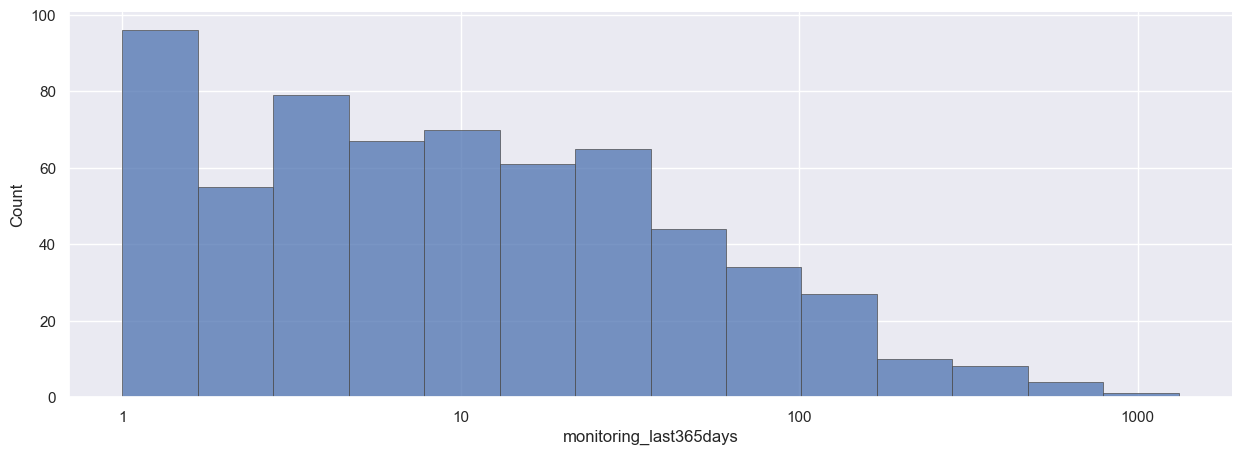

In [657]:
# filter only filled monitoring events
case_monitoring_last365days_view = case_dataset_clean.loc[case_dataset_clean.monitoring_last365days.isna() == False, ['monitoring_last365days']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_monitoring_last365days_view,
    x="monitoring_last365days", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column monitoring_last365days.")

##### field_exploring_events

There is nothing to be cleaned in the column field_exploring_events.


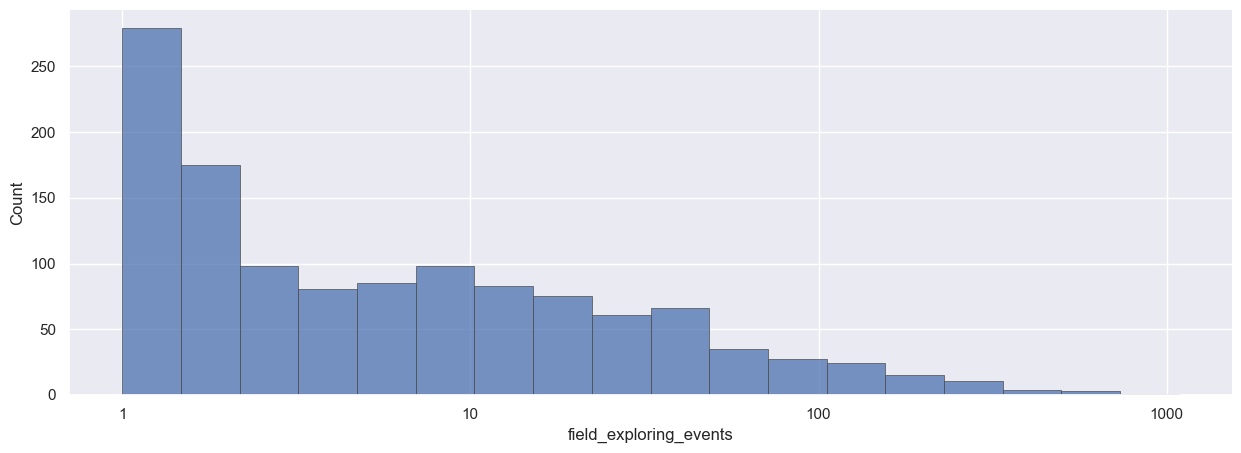

In [658]:
# filter only filled monitoring events
case_field_exploring_events_view = case_dataset_clean.loc[case_dataset_clean.field_exploring_events.isna() == False, ['field_exploring_events']]

f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)

sns.histplot(
    case_field_exploring_events_view,
    x="field_exploring_events", 
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

print("There is nothing to be cleaned in the column field_exploring_events.")

##### n_active_fields

In the boxplot is easy to identify a really large number of outliers. This plot contains 9562 data points.


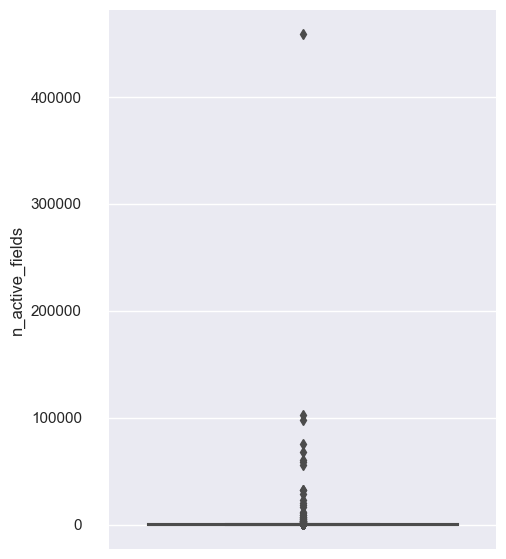

In [659]:
# filter only filled n_active_fields
case_n_active_fields_view = case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, ['n_active_fields']]

# configure the figure size
sns.set(rc={'figure.figsize':(5,7)})

# plot the boxplot for visualization
sns.boxplot(y="n_active_fields",
            data=case_n_active_fields_view)

sns.despine(offset=10, trim=True)

print('In the boxplot is easy to identify a really large number of outliers. This plot contains {} data points.'.format(case_dataset_clean.loc[case_dataset_clean.n_active_fields.isna() == False, 'n_active_fields'].count()))

We can see that now the data is closer to each other and we can continue using this data. We removed 22 outliers, so this plot contains 9540 data points.


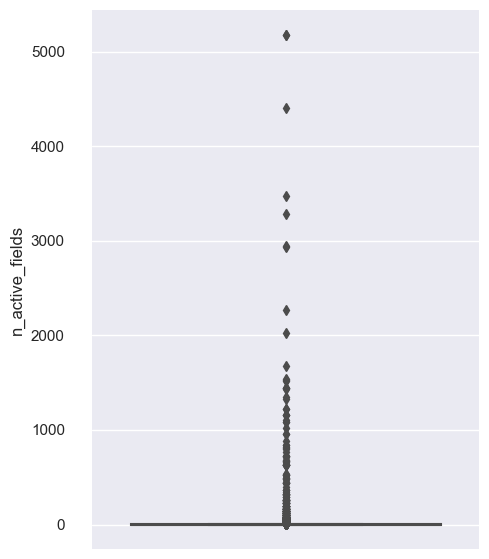

In [660]:
# get mean and standard deviation
mean_value = case_n_active_fields_view['n_active_fields'].mean()
std_value = case_n_active_fields_view['n_active_fields'].std()

# Define outlier threshold as 1 to mitigate the influence of extreme values on the overall distribution
threshold = 1   

# Identify outliers by comparing the absolute difference of each value in the 'n_active_fields' column to the mean with a threshold based on the standard deviation.
outlier_mask = abs(case_n_active_fields_view['n_active_fields'] - mean_value) > (threshold * std_value)

# Remove outliers
df_filtered = case_n_active_fields_view[~outlier_mask]

# Print the filtered DataFrame without outliers
sns.boxplot(y="n_active_fields",
            data=df_filtered)

sns.despine(offset=10, trim=True)

# explanation of what was done and 
print('We can see that now the data is closer to each other and we can continue using this data. We removed {} outliers, so this plot contains {} data points.'.format(case_n_active_fields_view.loc[outlier_mask, 'n_active_fields'].count(), df_filtered['n_active_fields'].count()))

case_dataset_clean = case_dataset_clean[~outlier_mask]

##### filling missing data
n_fields / total_field_area / recommendation_generated / map_created / map_created_last365days / monitoring_events / monitoring_last365days / field_exploring_events / field_exploring_last365days

In [661]:
# fill missing values
case_dataset_clean['n_fields'] = case_dataset_clean['n_fields'].fillna(0)
case_dataset_clean['total_field_area'] = case_dataset_clean['total_field_area'].fillna(0.0)
case_dataset_clean['recommendation_generated'] = case_dataset_clean['recommendation_generated'].fillna(0.0).astype(int)
case_dataset_clean['map_created'] = case_dataset_clean['map_created'].fillna(0.0).astype(int)
case_dataset_clean['map_created_last365days'] = case_dataset_clean['map_created_last365days'].fillna(0.0).astype(int)
case_dataset_clean['monitoring_events'] = case_dataset_clean['monitoring_last365days'].fillna(0.0).astype(int)
case_dataset_clean['field_exploring_events'] = case_dataset_clean['field_exploring_events'].fillna(0.0).astype(int)
case_dataset_clean['field_exploring_last365days'] = case_dataset_clean['field_exploring_last365days'].fillna(0.0).astype(int)

##### total_n_fields

During the analysis, it was identified that the numbers contained in the columns `n_active_fields` and `n_fields` should be added together. It is understood that the column `n_fields` is the total of fields, but as it is smaller than the total of active fields, this information means that the column only contains the total of fields that are not active, therefore, it is necessary to do the sum of the columns to capture the total of fields available to the user.

In [662]:
case_dataset_clean['total_n_fields'] = case_dataset_clean.n_active_fields + case_dataset_clean.n_fields

#### region
removing regions that are not in Brazil

In [663]:
case_dataset_clean = case_dataset_clean.loc[(~case_dataset_clean.region.isin(['Cantabria','Veracruz']))]

### 1.3 Create a new column to identify active users

In [664]:
# Calculate the current date for churn calculation
current_date = pd.to_datetime('today')

# copy the dataset clean to a new variable to keep historical data
case_dataset_prepared = case_dataset_clean.copy()

### Active users: users that have used the app at least once in the last 12-rolling months. If last event is earlier than that, the user is considered to have churned.
# Calculate active users by creating a column called active_users, where users that are active receives true, otherwise false.
case_dataset_prepared.loc[case_dataset_prepared['last_event_date'] >= current_date - pd.DateOffset(years=1), 'active_users'] = True
case_dataset_prepared.loc[case_dataset_prepared.active_users.isna(), 'active_users'] = False

# 2. Select or Create Relevant Features and Prepare the dataset for Churn Model

### Checking for data balancing

In [665]:
print(case_dataset_prepared.active_users.value_counts())
print("\nThe users who churned represents {:.2f}% do dataset.\n".format((case_dataset_prepared[case_dataset_prepared.active_users == False].shape[0] / case_dataset_prepared.shape[0]) * 100))

active_users
True     5035
False    4503
Name: count, dtype: int64

The users who churned represents 47.21% do dataset.



### Selection relevant data for the model



In [666]:
case_dataset_prepared.drop(['bu_name'], axis='columns', inplace=True)

##### Creating columns for the model

In [667]:
# create column churn date
case_dataset_prepared['churn_date'] = case_dataset_prepared.loc[case_dataset_prepared.active_users == False, 'last_event_date']

# days to churn
case_dataset_prepared['days_to_churn'] = (case_dataset_prepared.loc[case_dataset_prepared.active_users == False,'churn_date'] - case_dataset_prepared.loc[case_dataset_prepared.active_users == False,'user_reg_date']).dt.days

# days registered
case_dataset_prepared['days_registered'] = abs(case_dataset_prepared.user_reg_date - datetime.now()).dt.days

# days_since_last_event
case_dataset_prepared['days_since_last_event'] = abs(case_dataset_prepared.last_event_date - datetime.now()).dt.days

# change the column active_users to churn
case_dataset_prepared['churn'] = case_dataset_prepared['active_users'].replace({False: 1, True: 0}) 

#### Dropping columns that will not be used

In [668]:
case_dataset_prepared.drop(['active_users', 'user_type', 'user_reg_date', 'map_created_last_date', 'last_event_date','recommendation_generated_last_date','monitoring_last_date','field_exploring_last_date', 'churn_date', 'days_to_churn', 'main_crop', 'state', 'region'], axis='columns', inplace=True)

In [669]:
case_dataset_prepared 

,id,loyalty,days_since_last_visit,recommendation_generated,map_created,map_created_last365days,monitoring_events,monitoring_last365days,field_exploring_events,field_exploring_last365days,n_active_fields,n_fields,n_farms,total_active_field_area,total_field_area,total_n_fields,days_registered,days_since_last_event,churn
0,1,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,8,8,0
1,5,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,8,8,0
2,6,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,8,8,0
3,7,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,10,8,0
4,14,False,1,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,112566,False,669,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,682,676,1
12758,112600,False,669,0,0,0,0,NaN,0,0,1,1,1,171.50,171.50,2,676,676,1
12759,112609,False,669,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,676,676,1
12762,112637,False,669,0,0,0,0,NaN,0,0,0,0,0,0.00,0.00,0,676,676,1


In [670]:
case_dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9538 entries, 0 to 12769
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9538 non-null   int64  
 1   loyalty                      9538 non-null   bool   
 2   days_since_last_visit        9538 non-null   int64  
 3   recommendation_generated     9538 non-null   int32  
 4   map_created                  9538 non-null   int32  
 5   map_created_last365days      9538 non-null   int32  
 6   monitoring_events            9538 non-null   int32  
 7   monitoring_last365days       606 non-null    float64
 8   field_exploring_events       9538 non-null   int32  
 9   field_exploring_last365days  9538 non-null   int32  
 10  n_active_fields              9538 non-null   int64  
 11  n_fields                     9538 non-null   int64  
 12  n_farms                      9538 non-null   int64  
 13  total_active_field_are

<Axes: >

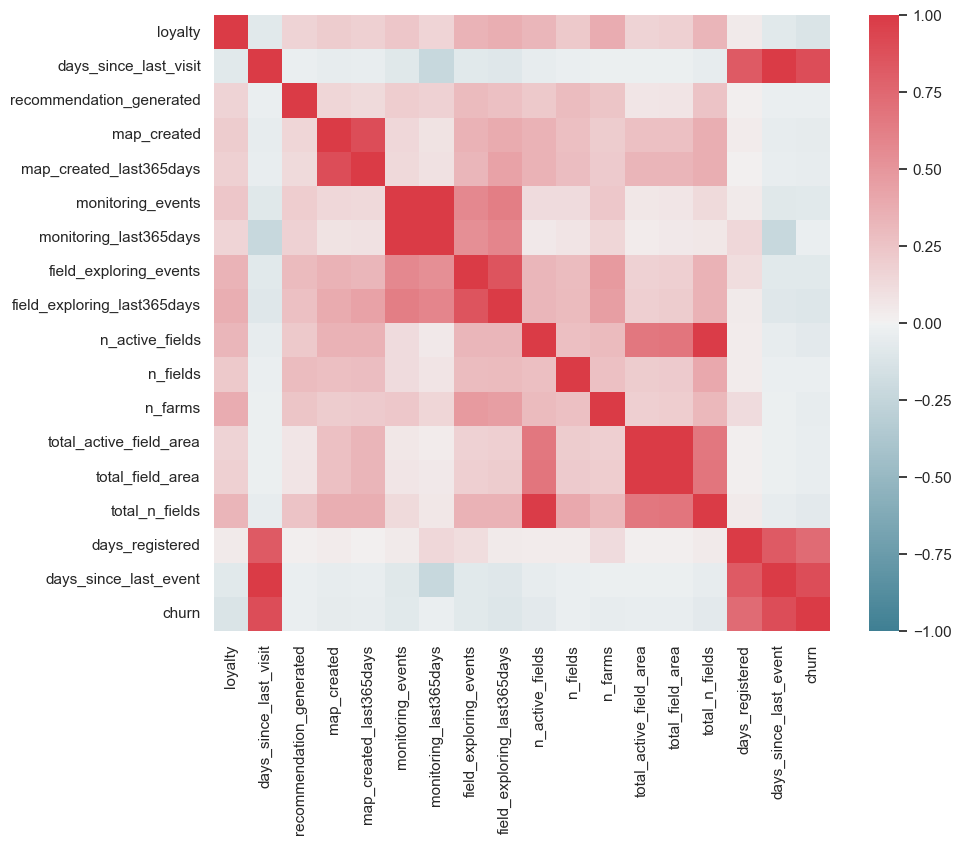

In [671]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(case_dataset_prepared.drop(['id'], axis=1).corr(),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

loyalty users have higher retention rates compared to non-loyalty users for each churn reason. Specifically, the field_exploring_events feature has the highest average value for both churned and retained loyalty users, indicating its importance in retaining loyalty users. On the other hand, non-loyalty users have lower utilization rates across all churn reasons, suggesting the need to improve engagement and utilization of the app features for this user group.

## Preparing the Model

#### Importing the libs

In [672]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from itertools import combinations
import pickle

#### Preparing the data for training

In [673]:
# Load the dataset
data = case_dataset_prepared.copy()

# Select relevant columns
columns = ['loyalty', 'recommendation_generated', 'map_created', 'monitoring_events',
           'field_exploring_events', 'n_farms', 'total_field_area', 'churn']

data = data[columns]

# Split the data into features and target variable
X = data.drop("churn", axis=1)
y = data["churn"] 

In [674]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = case_dataset_prepared.copy().fillna(0)

# Select relevant columns
columns = ['loyalty', 'recommendation_generated', 'map_created', 'monitoring_events',
           'field_exploring_events', 'n_farms', 'total_field_area', 'churn']

data = data[columns]

# Split the data into features and target variable
X = data.drop("churn", axis=1)
y = data["churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Check for overfitting
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("Train Accuracy:", train_accuracy)

Accuracy: 0.5796645702306079
Train Accuracy: 0.5798165137614679


In [675]:
model.predict_proba(X_train)[5492]

array([0.51758745, 0.48241255])

In [696]:
XXXX = pd.DataFrame(model.predict_proba(X_train))
XXXX = XXXX.rename(columns={0:'false', 1:'true'})

XXXX.loc[XXXX['true'] >= 0.50, 'churn'] = True
XXXX.loc[XXXX['churn'].isna(), 'churn'] = False
XXXX[['churn', 'true']].groupby('churn').count()

# f, ax = plt.subplots(figsize=(7, 5))
# sns.despine(f)

# sns.histplot(
#     XXXX.rename(columns={0:'false', 1:'true'}),
#     x="true", 
#     edgecolor=".3",
#     linewidth=.5
# )

,true
churn,
False,5813
True,1817


In [676]:
model.predict(X_train)[5492]

0

In [677]:
# copy the dataset adding the columns that will be used in the model
df_final = case_dataset_prepared[columns].copy().fillna(0).drop("churn", axis=1)

# predict the result and add to the column churn_predicted
df_final['churn_predicted'] = model.predict(df_final)

df_final[['churn_predicted', 'monitoring_events']].groupby('churn_predicted').count()

,monitoring_events
churn_predicted,
0,7305
1,2233


In [678]:
case_dataset_prepared[['churn', 'monitoring_events']].groupby('churn').count()

,monitoring_events
churn,
0,5035
1,4503


In [602]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Perform recursive feature elimination with cross-validation
rfe = RFECV(estimator=model, cv=5)
X_selected = rfe.fit_transform(X, y)

# Get the support mask of the selected features
feature_mask = rfe.support_

# Get the names of the selected features
selected_features = X.columns[feature_mask]


In [603]:
selected_features

Index(['loyalty', 'days_since_last_visit', 'recommendation_generated',
       'map_created', 'map_created_last365days', 'monitoring_events',
       'monitoring_last365days', 'field_exploring_events',
       'field_exploring_last365days', 'n_active_fields', 'n_fields', 'n_farms',
       'total_active_field_area', 'total_field_area', 'total_n_fields',
       'days_registered', 'days_since_last_event'],
      dtype='object')

In [604]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the selected features
selected_features = X.columns[indices[:5]]  # Select top 5 features


In [698]:
pd.options.display.float_format = '{:.2f}'.format
importances[0]

7.195042329411516e-05

In [606]:
selected_features

Index(['days_since_last_event', 'days_since_last_visit', 'days_registered',
       'field_exploring_last365days', 'monitoring_events'],
      dtype='object')

In [608]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_clf, cv=3)
calibrated_clf.fit(X, y)
print(len(calibrated_clf.calibrated_classifiers_))
print(calibrated_clf.predict_proba(X)[:5, :])

from sklearn.model_selection import train_test_split
X_train, X_calib, y_train, y_calib = train_test_split(X, y, random_state=42)
base_clf = GaussianNB()
base_clf.fit(X_train, y_train)
calibrated_clf = CalibratedClassifierCV(base_clf, cv="prefit")
calibrated_clf.fit(X_calib, y_calib)
print(len(calibrated_clf.calibrated_classifiers_))
print(calibrated_clf.predict_proba([[-0.5, 0.5]]))

3
[[0.98352762 0.01647238]
 [0.98352762 0.01647238]
 [0.98352762 0.01647238]
 [0.98352762 0.01647238]
 [0.98352762 0.01647238]]
1


ValueError: X has 2 features, but GaussianNB is expecting 17 features as input.

#### Preparing the model

In [580]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

#### Train the model

In [581]:
# Create Decision Tree Classifier with the best columns
model = DecisionTreeClassifier()

# Train the Decision Tree Classifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Check the scores

In [582]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) 
print("Best Accuracy:", accuracy)

Best Accuracy: 0.560272536687631


In [583]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      1026
           1       0.58      0.17      0.27       882

    accuracy                           0.56      1908
   macro avg       0.57      0.53      0.48      1908
weighted avg       0.57      0.56      0.49      1908



#### Create a pickle file with the best model selected

In [584]:
# Export the best model to a pickle file
pickle.dump(model, open("DecisionTreeClassifier.pkl", "wb"))

#### Create the final dataframe with the predicted churn values

In [585]:
# Load the best model from the pickle file
best_model = pickle.load(open("DecisionTreeClassifier.pkl", "rb")) 

# copy the dataset adding the columns that will be used in the model
df_final = case_dataset_prepared[columns].copy().drop("churn", axis=1)

# predict the result and add to the column churn_predicted
df_final['churn_predicted'] = model.predict(df_final)

df_final[['churn_predicted', 'monitoring_events']].groupby('churn_predicted').count()

,monitoring_events
churn_predicted,
0,8137
1,1401


In [586]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Load the dataset
data = case_dataset_prepared.copy()

# Select relevant columns
columns = ['loyalty', 'recommendation_generated', 'map_created', 'monitoring_events',
           'field_exploring_events', 'n_farms', 'total_field_area', 'churn']

data = data[columns]

# Split the data into features and target variable
X = data.drop("churn", axis=1)
y = data["churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    LogisticRegression(),
    lgb.LGBMClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(type(model).__name__)
    print("Accuracy:", accuracy)
    print("---")

LogisticRegression
Accuracy: 0.5796645702306079
---
[LightGBM] [Info] Number of positive: 3621, number of negative: 4009
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 7630, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474574 -> initscore=-0.101792
[LightGBM] [Info] Start training from score -0.101792


LGBMClassifier
Accuracy: 0.5749475890985325
---
DecisionTreeClassifier
Accuracy: 0.560272536687631
---
RandomForestClassifier
Accuracy: 0.5618448637316562
---
KNeighborsClassifier
Accuracy: 0.5020964360587002
---


In [587]:
model

KNeighborsClassifier()